In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

In [3]:
import pandas as pd

In [4]:
iris = load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# design matrix
X = iris.data

In [8]:
# targets
y = iris.target

In [9]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['label'] = pd.Series(iris.target_names[y], dtype='category')

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

<Axes: xlabel='petal length', ylabel='petal width'>

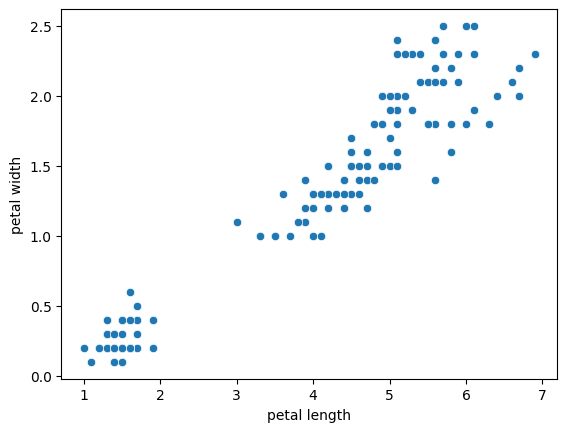

In [12]:
sns.scatterplot(data=df, x='petal length', y='petal width')

In [13]:
palette = {'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple'}

<Axes: xlabel='petal length', ylabel='petal width'>

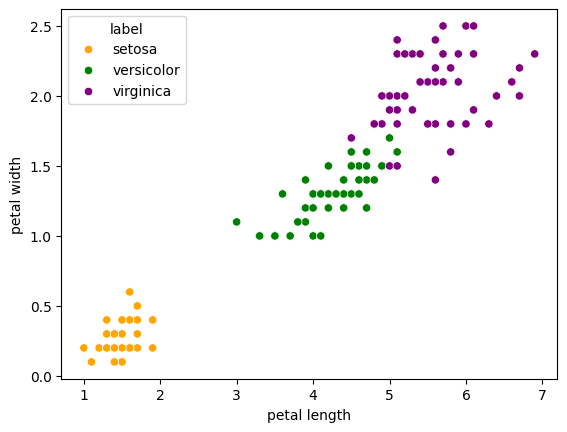

In [14]:
sns.scatterplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)

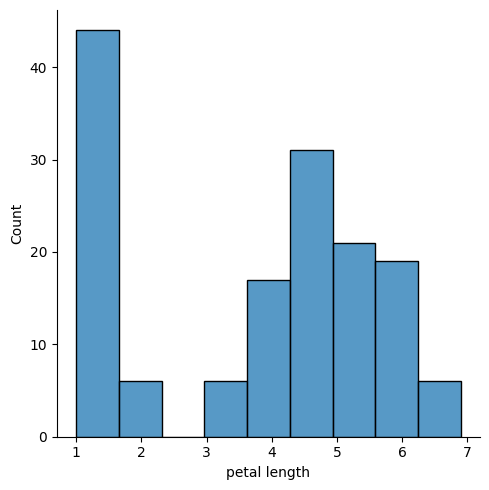

In [15]:
sns.displot(data=df, x='petal length')

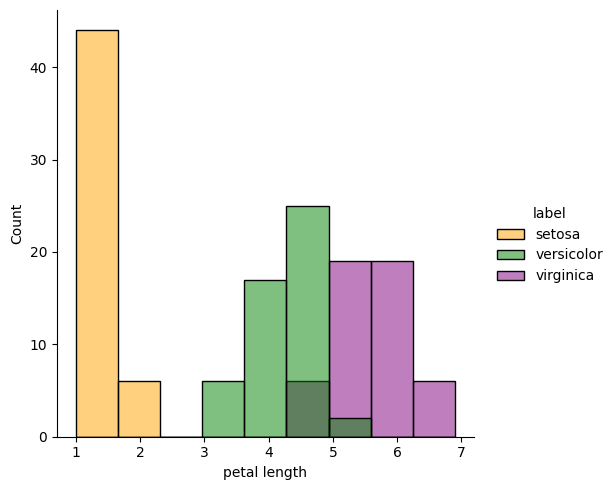

In [16]:
sns.displot(data=df, x='petal length', hue='label', palette=palette)

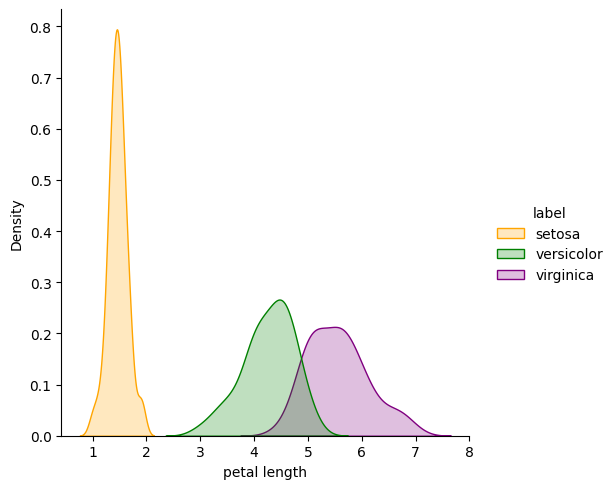

In [17]:
sns.displot(data=df, x='petal length', hue='label', palette=palette, kind='kde', fill=True)

C:\Users\hieut\AppData\Local\Temp\ipykernel_10092\4220320119.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='petal length', palette=palette, kind='kde', fill=True)


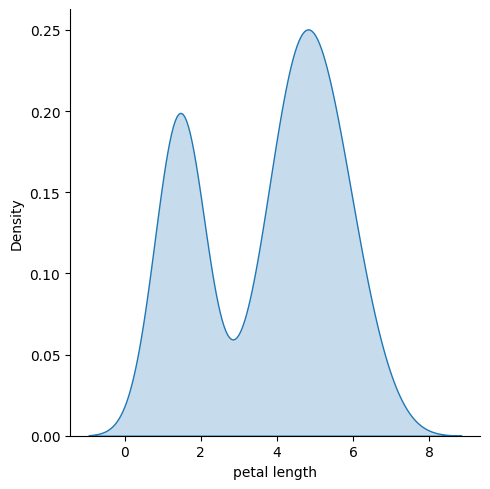

In [18]:
sns.displot(data=df, x='petal length', palette=palette, kind='kde', fill=True)

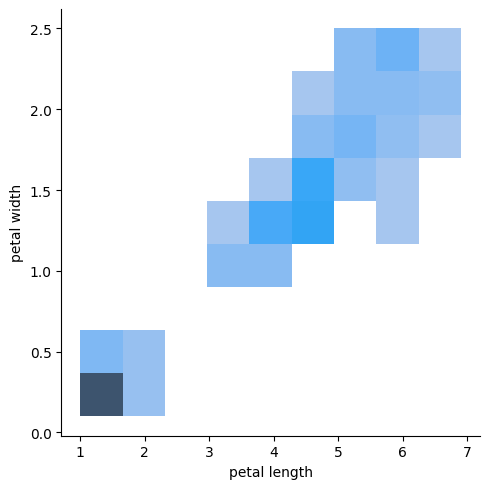

In [19]:
sns.displot(data=df, x='petal length', y='petal width')

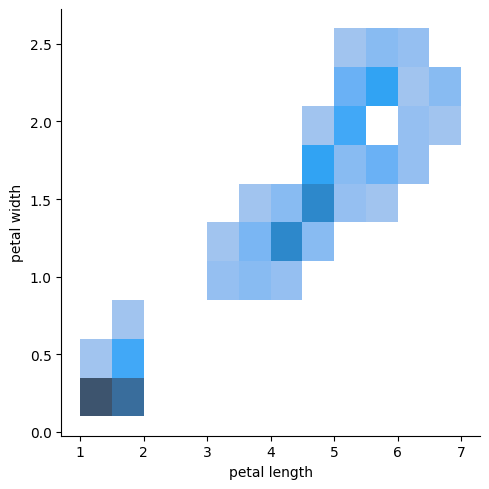

In [20]:
sns.displot(data=df, x='petal length', y='petal width', binwidth=(0.5, 0.25))

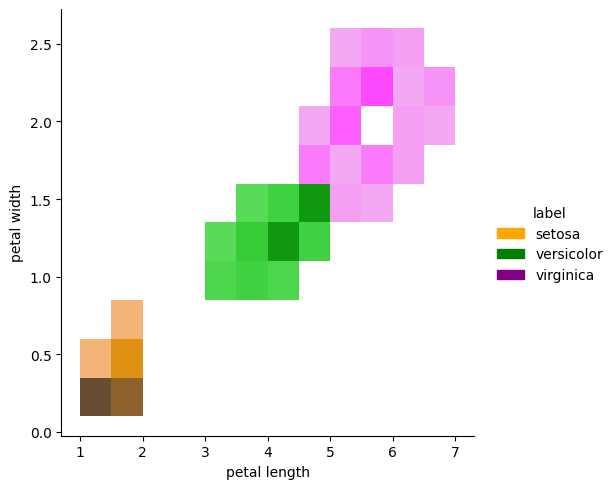

In [21]:
sns.displot(data=df, x='petal length', y='petal width', binwidth=(0.5, 0.25), hue='label', palette=palette)

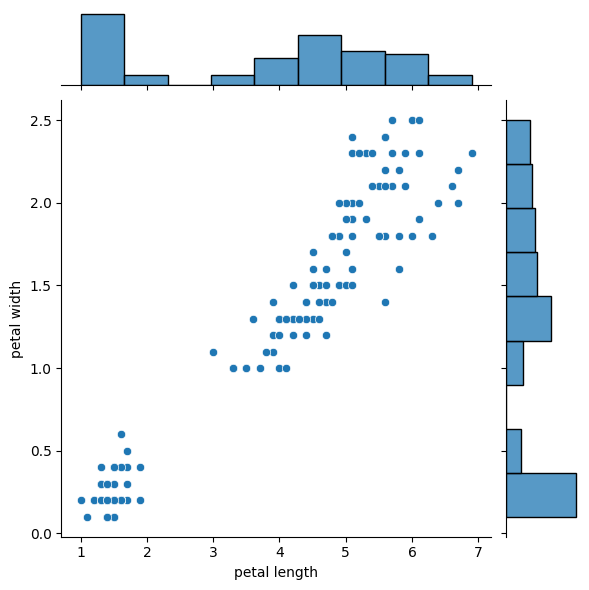

In [22]:
sns.jointplot(data=df, x='petal length', y='petal width')

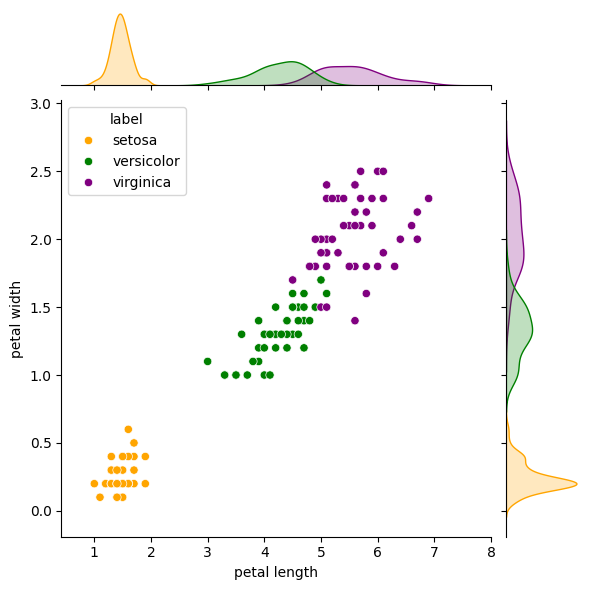

In [23]:
sns.jointplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)

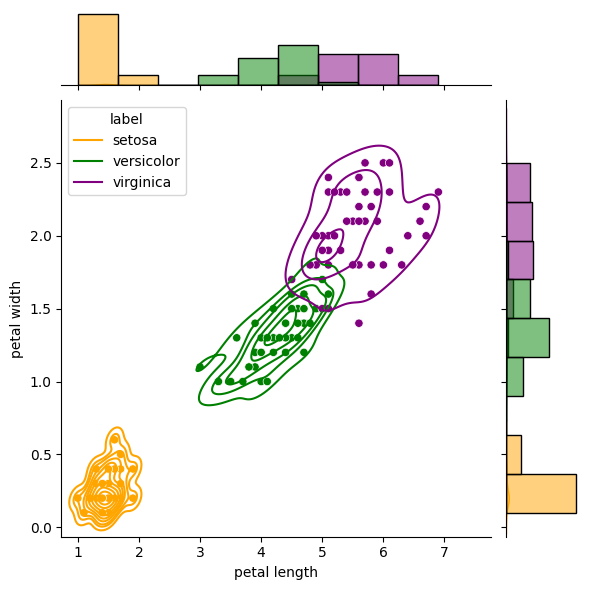

In [24]:
g = sns.jointplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

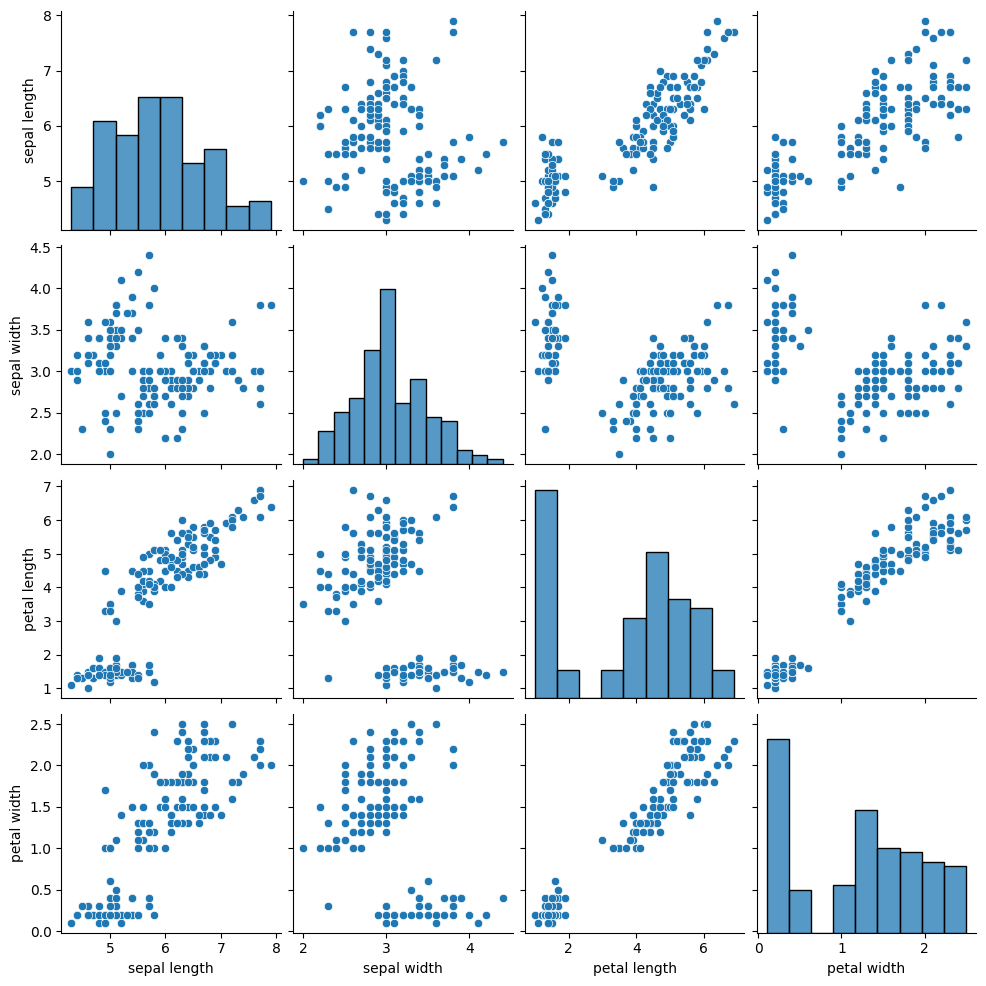

In [25]:
sns.pairplot(data=df, vars=df.columns[0:4])

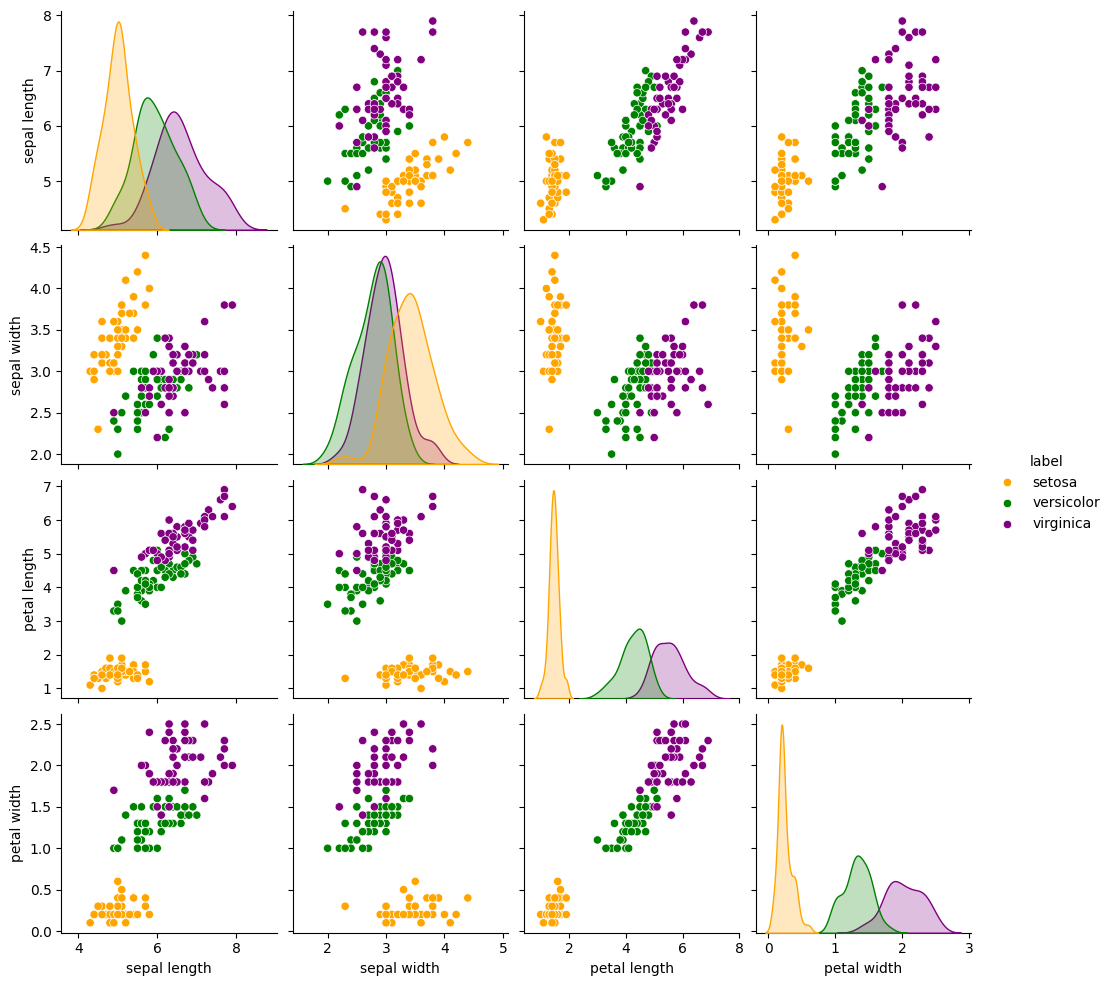

In [26]:
sns.pairplot(data=df, vars=df.columns[0:4], hue='label', palette=palette)
plt.savefig('iris.pdf')

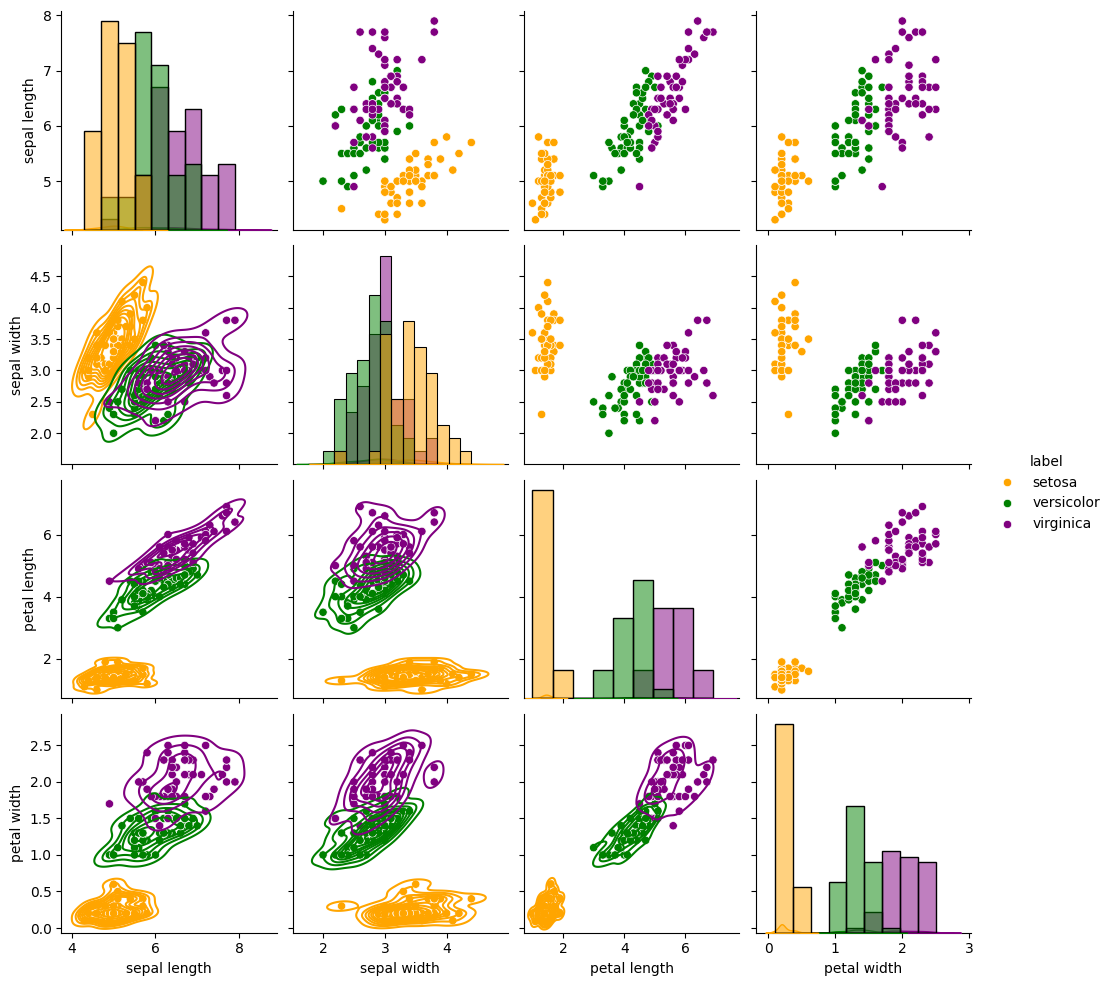

In [27]:
g = sns.pairplot(data=df, vars=df.columns[0:4], hue='label', palette=palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [30]:
from graphviz import Source
from sklearn.tree import export_graphviz

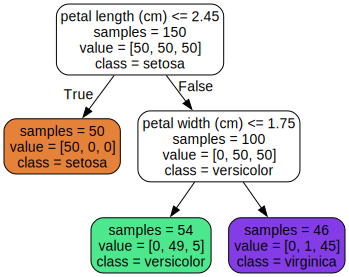

In [31]:
export_graphviz(model, out_file='iris.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('iris.dot')

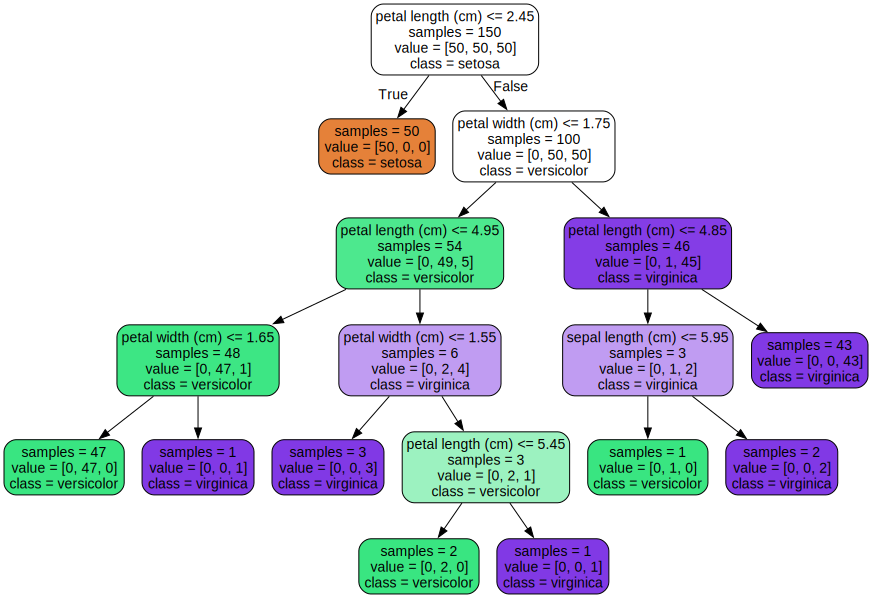

In [32]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
export_graphviz(model, out_file='iris.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('iris.dot')

In [33]:
penguins = sns.load_dataset('penguins')

In [34]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


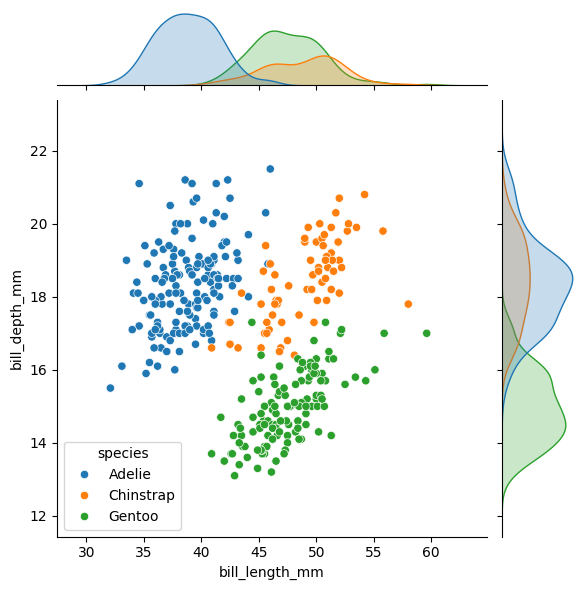

In [35]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')